# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<font color=red> Описание данных </font>
---


 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
 - balcony — число балконов;
 - ceiling_height — высота потолков (м);
 - cityCenters_nearest — расстояние до центра города (м);
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия);
 - first_day_exposition — дата публикации;
 - floor — этаж;
 - floors_total — всего этажей в доме;
 - is_apartment — апартаменты (булев тип);
 - kitchen_area — площадь кухни в квадратных метрах (м²);
 - last_price — цена на момент снятия с публикации;
 - living_area — жилая площадь в квадратных метрах(м²);
 - locality_name — название населённого пункта;
 - open_plan — свободная планировка (булев тип);
 - parks_around3000 — число парков в радиусе 3 км;
 - parks_nearest — расстояние до ближайшего парка (м);
 - ponds_around3000 — число водоёмов в радиусе 3 км;
 - ponds_nearest — расстояние до ближайшего водоёма (м);
 - rooms — число комнат;
 - studio — квартира-студия (булев тип);
 - total_area — площадь квартиры в квадратных метрах (м²);
 - total_images — число фотографий квартиры в объявлении;
 
Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Шаг 1. Загрузка данных

In [1]:
# импортируем данные и сохраним таблицу в переменной ad_archive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ad_archive = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
ad_archive

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Данные в таблице вместо запятой разделены обратным слешем, укажем разделитель данных - знак табуляции: '\t'.

In [2]:
ad_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В таблице представлены данные о 23 699 объявлениях. Не все столбцы полностью заполнены. Пропуски в столбцах ceiling_height - высота потолков, floors_total - всего этажей в доме, living_area -  жилая площадь в квадратных метрах(м²), kitchen_area - площадь кухни в квадратных метрах (м²),  balcony - число балконов, locality_name - название населённого пункта, - появились, возможно, из-за того, что эти данные и не были указаны в объявлении. В то же время, количество балконов могло быть не указано ввиду их отсутствия в продаваемой квартире. Отсутствующие значения в столбце is_apartment - апартаменты (булев тип) связаны с тем, что тип данных в столбце object вместо bool. В дальнейшем необходимо заменить тип данных этого столбца. Значения столбцов airports_nearest - расстояние до ближайшего аэропорта в метрах (м), cityCenters_nearest - расстояние до центра города (м), parks_around3000 - число парков в радиусе 3 км, parks_nearest - расстояние до ближайшего парка (м), ponds_around3000 - число водоёмов в радиусе 3 км, ponds_nearest - расстояние до ближайшего водоёма (м), - заполнялись автоматически на основе картографических данных, нужно подробнее рассмотреть почему эти столбцы не заполнены полностью.

### Шаг 2. Предобработка данных
#### Обработка пропусков

1. Заполним пропуски в столбце ceiling_height медианой по этому столбцу

In [3]:
ad_archive['ceiling_height'] = ad_archive['ceiling_height'].fillna(value=ad_archive['ceiling_height'].median())
ad_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Пропуски в столбце с высотой потолков заполнены

2. Рассмотрим столбец с общим количеством этажей в доме, где продается квартира.

In [4]:
ad_archive['floors_total'].value_counts().sum()

23613

In [5]:
# из 23 699 строк заполнены 23 613, то есть 86 строк без указания количества этажей. Это примерно 1% от общего количества.
# Удалим их. Для этого сначала заполним пустующие строки значением floorless: 

ad_archive['floors_total'] = ad_archive['floors_total'].fillna("floorless")


In [6]:
# а затем удалим те строки, по которым произошло заполнение
ad_archive = ad_archive[ad_archive['floors_total'] != 'floorless']

In [7]:
ad_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null object
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 12133 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000

Строки с незаполненными значениями по столбцу floors_total удалены

3. Пропущенные значения в столбце kitchen_area - площадь кухни в квадратных метрах(м²) заполним вычитанием значений столбца living_area  - жилая площадь в квадратных метрах (м²) из значений столбца total_area - площадь квартиры в квадратных метрах (м²):

In [8]:
# введем переменную kitchen_area_calc, которая будет считать жилую площадь
kitchen_area_calc = ad_archive['total_area'] - ad_archive['living_area']

# заполним NaN в столбце с площадью кухни этой переменной
ad_archive['kitchen_area'] = ad_archive['kitchen_area'].fillna(value=kitchen_area_calc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
# посмотрим изменения
ad_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null object
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            22182 non-null float64
balcony                 12133 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000

Количество пропущенных значений в столбце с площадью кухни сократилось, но осталось существенным. Заменим их на медианное значение площади кухни

In [10]:
ad_archive['kitchen_area'] = ad_archive['kitchen_area'].fillna(value=ad_archive['kitchen_area'].median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
ad_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null object
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 12133 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000

Пропущенные значения по столбцу с площадью кухни полностью заполнены

4. Пропущенные значения в столбце living_area - жилая площадь в квадратных метрах (м²) заполним вычитанием значений столбца kitchen_area — площадь кухни в квадратных метрах(м²) из значений столбца total_area - площадь квартиры в квадратных метрах (м²):

In [12]:
# введем переменную living_area_calc, которая будет считать жилую площадь
living_area_calc = ad_archive['total_area'] - ad_archive['kitchen_area']

# заполним NaN в столбце с жилой площадью этой переменной
ad_archive['living_area'] = ad_archive['living_area'].fillna(value=living_area_calc)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
ad_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null object
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 12133 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000

Пропущенные значения по столбцу с жилой площадью полностью заполнены

5. Заполним нулями пропущенные значения в столбце с количеством балконов

In [14]:
ad_archive['balcony'] = ad_archive['balcony'].fillna(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
ad_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null object
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 23613 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000

6. В столбце с названием населенного пункта не заполнено 49 строк. Это менее 1% всех строк. Удалим их.

In [16]:
# для этого сначала заполним их значением nameless
ad_archive['locality_name'] = ad_archive['locality_name'].fillna("nameless")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
# а затем удалим те строки, по которым произошло заполнение
ad_archive = ad_archive[ad_archive['locality_name'] != 'nameless']

In [18]:
ad_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null object
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000

In [19]:
ad_archive.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000,8,NaN,...,25.000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.600,1,NaN,...,11.000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.300,4,NaN,...,8.300,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,149.705,9,NaN,...,9.295,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.000,13,NaN,...,41.000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Значения столбца first_day_exposition переведены в тип данных - даты.

7. Заполним пропущенные значения столбца days_exposition медианным значение по столбцу:

In [20]:
ad_archive['days_exposition'] = ad_archive['days_exposition'].fillna(value=ad_archive['days_exposition'].median())

#### Замена типа данных

Преобразуем тип значений столбца first_day_exposition в datetime64:

In [21]:
ad_archive['first_day_exposition'] = pd.to_datetime(ad_archive['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [22]:
ad_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null object
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_ar

Тип данных в столбце с количеством этажей в доме object, переведем его в числовой:

In [23]:
ad_archive['floors_total'] = pd.to_numeric(ad_archive['floors_total'], errors='coerce')

In [24]:
ad_archive['floors_total'].value_counts()

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

Тип данных в столбце is_apartment - object, вместо bool. Рассмотрим столбцец подробнее.

Для 20 805 строк этого столбца данные не заполнены. Скорее всего в них должно быть проставлено значение False, что означает, что продаваемыя квартира к апартаментам не относится.

In [25]:
ad_archive['is_apartment'] = ad_archive['is_apartment'].fillna(0)

In [26]:
ad_archive['is_apartment'].isnull().sum()

0

In [27]:
ad_archive['is_apartment'].unique()

array([0, True], dtype=object)

In [28]:
# заменим значение True на 1
ad_archive['is_apartment'] = ad_archive['is_apartment'].replace(True, 1)

In [29]:
ad_archive['is_apartment'].unique()

array([0, 1], dtype=object)

In [30]:
# переведем значения столбца is_apartment в булевый
ad_archive['is_apartment'] = ad_archive['is_apartment'].astype('bool')

In [31]:
ad_archive['is_apartment'].value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

In [32]:
ad_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_ar

#### Обработка дубликатов

In [33]:
ad_archive.duplicated().sum()

0

In [94]:
ad_archive.pivot_table(
    index='locality_name', columns = 'last', values= 'last_price',
                    aggfunc={'last_price': ['count', 'mean']})

count                                                  \
rooms                   0      1      2      3     4    5   6   7   8   9    
locality_name                                                                
Бокситогорск           NaN    3.0    9.0    3.0   1.0  NaN NaN NaN NaN NaN   
Волосово               NaN   12.0   15.0    9.0   NaN  NaN NaN NaN NaN NaN   
Волхов                 NaN   32.0   52.0   23.0   4.0  NaN NaN NaN NaN NaN   
Всеволожск             6.0  144.0  137.0  100.0  11.0  NaN NaN NaN NaN NaN   
Выборг                 NaN   66.0   93.0   62.0  15.0  1.0 NaN NaN NaN NaN   
...                    ...    ...    ...    ...   ...  ...  ..  ..  ..  ..   
село Путилово          NaN    NaN    2.0    NaN   NaN  NaN NaN NaN NaN NaN   
село Рождествено       NaN    1.0    2.0    NaN   NaN  NaN NaN NaN NaN NaN   
село Русско-Высоцкое   NaN    4.0    4.0    1.0   NaN  NaN NaN NaN NaN NaN   
село Старая Ладога     NaN    1.0    1.0    NaN   NaN  NaN NaN NaN NaN NaN   
село Шум               NaN    NaN    NaN    1.0   NaN  NaN NaN NaN NaN NaN   

                      ... mean                                      
rooms                 ...   7   8   9   10  11  12  14  15  16  19  
locality_name         ...                                           
Бокситогорск          ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
Волосово              ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
Волхов                ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
Всеволожск            ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
Выборг                ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...                   ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
село Путилово         ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
село Рождествено      ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
село Русско-Высоцкое  ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
село Старая Ладога    ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
село Шум              ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[364 rows x 34 columns]

Дубликатов нет

### Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем цену квадратного метра. Для этого создадим новый столбец price_meter в таблице, значения которого будут рассчитаны как отношение цены квартиры по объявлению (столбец last_price) к площади квартиры в квадратных метрах (м²) (столбец total_area):

In [34]:
ad_archive['price_meter'] = ad_archive['last_price'] / ad_archive['total_area']

Определим день недели публикации объявления и добавим колонку в таблицу:

In [35]:
ad_archive['ad_weekday_number'] = ad_archive['first_day_exposition'].dt.weekday

In [36]:
# для удобства заменим числовые значения дней на их названия
def ad_weekday(row):
    
    weekday = row['ad_weekday_number']
  
    if weekday == 0:
        return 'понедельник'
   
    if weekday == 1:
        return 'вторник'
    
    if weekday == 2:
        return 'среда'
    
    if weekday == 3:
        return 'четверг'
    
    if weekday == 4:
        return 'пятница'
    
    if weekday == 5:
        return 'суббота'
    
    if weekday == 6:
        return 'воскресенье'
# и добавим колонку в таблицу 
ad_archive['ad_weekday'] = ad_archive.apply(ad_weekday, axis=1)

Определим месяц публикации объявления и создадим отдельную колонку с его значением:

In [37]:
ad_archive['ad_month'] = ad_archive['first_day_exposition'].dt.month

Определим год публикации объявления и создадим отдельную колонку с его значением:

In [38]:
ad_archive['ad_year'] = ad_archive['first_day_exposition'].dt.year

Разобъем на категории колонку этаж квартиры: варианты — первый, последний, другой.
Для этого посмотрим уникальные значения этажей:

In [39]:
ad_archive['floor'].value_counts()

2     3351
3     3061
1     2909
4     2793
5     2612
6     1293
7     1211
8     1075
9     1045
10     684
11     520
12     519
13     376
15     340
14     333
16     315
17     226
18     175
19     144
21     119
22     111
20     108
23      98
24      61
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64

In [40]:
ad_archive['floor_group'] = ad_archive.apply(lambda _: '', axis=1)
ad_archive['floor_group'] = ad_archive.query('floor == "1" or floor == floor_group') 
# мы получаем столбец, в котором значения 'NaN' равны значению 'другой'.
ad_archive['floor_group'] = ad_archive['floor_group'].fillna('другой') 
# меняем значения 'NaN' на значение 'другой'
ad_archive.loc[ (ad_archive['floor'] == 1), 'floor_group'] = 'первый' 
# меняем остальные значения
ad_archive.loc[ (ad_archive['floor'] == ad_archive['floors_total']), 'floor_group'] = 'последний'

Посчитаем соотношение жилой и общей площади и добавим в таблицу колонку с этим соотношением:

In [41]:
ad_archive['ratio_living_total_area'] = ad_archive['living_area'] / ad_archive['total_area']

Посчитаем соотношение площади кухни и общей площади и добавим в таблицу колонку с этим соотношением:

In [42]:
ad_archive['ratio_kitchen_total_area'] = ad_archive['kitchen_area'] / ad_archive['total_area']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучим информацию по параметрам: площадь, цена, число комнат, высота потолков:

In [43]:
ad_archive['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

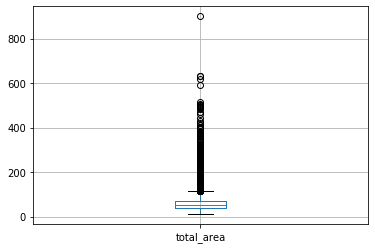

In [44]:
ad_archive.boxplot(column='total_area')
plt.show()


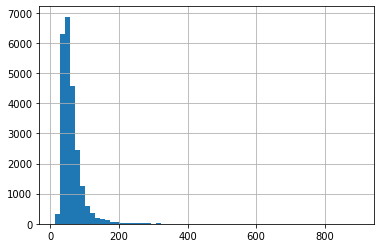

In [45]:
ad_archive['total_area'].hist(bins=60)

Площадь средней квартиры, выставленной на продажу, составляет 52 м2. В объявлениях содержится много выбросов по параметру площадь, это объявления с площадью квартиры более 114,25 м2.

In [46]:
ad_archive['last_price'].describe().apply('{0:.0f}'.format)

count        23565
mean       6540058
std       10910935
min          12190
25%        3400000
50%        4646000
75%        6790000
max      763000000
Name: last_price, dtype: object

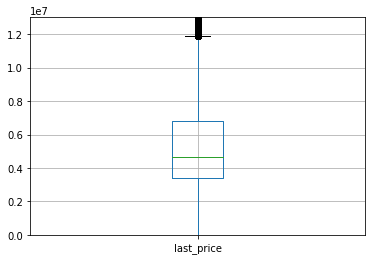

In [47]:
ad_archive.boxplot(column='last_price')
plt.ylim(0, 13000000)
plt.show()


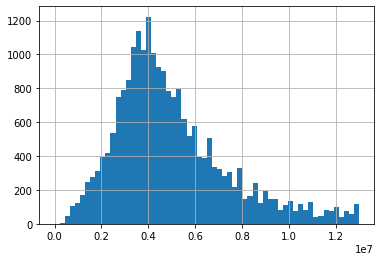

In [48]:
ad_archive['last_price'].hist(bins=60, range=(0,13000000))

Цена средней квартиры, выставленной на продажу, составляет 4 646 000 руб. В объявлениях содержится много выбросов по параметру цена, это объявления с ценой квартиры более 11 875 000 руб.

In [49]:
ad_archive['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

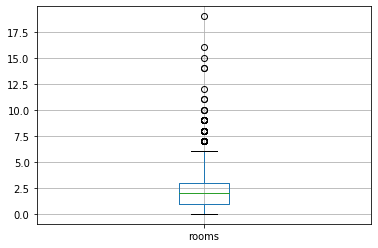

In [50]:
ad_archive.boxplot(column='rooms')

plt.show()


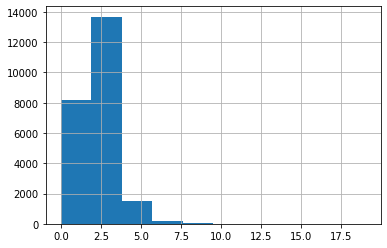

In [51]:
ad_archive['rooms'].hist()

In [52]:
ad_archive['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

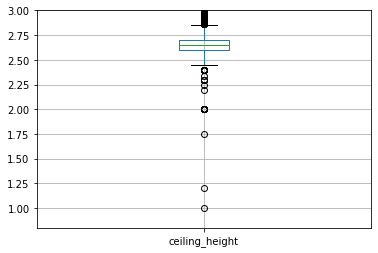

In [53]:
ad_archive.boxplot(column='ceiling_height')
plt.ylim(0.8, 3)
plt.show()


Изучим время продажи квартиры

In [54]:
ad_archive['days_exposition'].describe()

count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

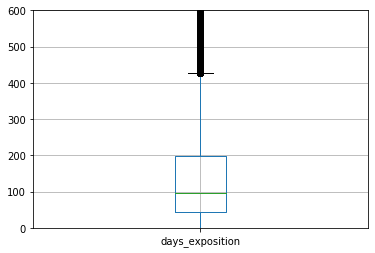

In [55]:
ad_archive.boxplot(column='days_exposition')
plt.ylim(0, 600)
plt.show()


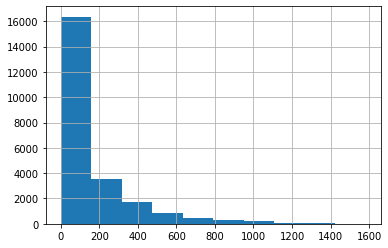

In [56]:
ad_archive['days_exposition'].hist()

Медиана числа дней продажи квартиры 95 дней, ее среднее значение - 181 день. Обычно продажа занимает от 45 до 220 дней. Если продажа произошла менее чем за 30 дней, это должно вызвать подозрение. Аномально долгая продажа - более 428 дней.

Уберем редкие и выбивающиеся значения:

In [57]:
# для этого cоздадим столбец too_large со значениями True — если общая площадь продаваемой квартиры более 114,3 м2, False — если меньше:
ad_archive['too_large'] = ad_archive['total_area'] > 114

# аналогично добавим столбец too_expensive со значениями True — если цена продаваемой квартиры более 11 875 000 руб.,
#False — если меньше
ad_archive['too_expensive'] = ad_archive['last_price'] > 11875000

# столбец a_lot_of_room - True — если комнат в продаваемой квартиры более 6, False — если меньше
ad_archive['a_lot_of_room'] = ad_archive['rooms'] > 6

# столбец too_low_ceiling_height - True — если высота потолков продаваемой квартиры менее 2,45 м, False — если более
ad_archive['too_low_ceiling_height'] = ad_archive['ceiling_height'] < 2.45

# столбец too_high_ceiling_height - True — если высота потолков продаваемой квартиры более 2,85 м, False — если менее
ad_archive['too_high_ceiling_height'] = ad_archive['ceiling_height'] > 2.85

# столбец too_fast_sale - True — если количество дней продажи квартиры менее 30 дней, False — если более
ad_archive['too_fast_sale'] = ad_archive['days_exposition'] < 30

# столбец too_slow_sale - True — если количество дней продажи квартиры более 428 дней, False — если менее
ad_archive['too_slow_sale'] = ad_archive['days_exposition'] > 428

In [58]:
# и сформируем таблицу, из которой уберем выбросы:
typical_ad_archive = ad_archive[(ad_archive['too_large'] == False) & 
     (ad_archive['too_expensive'] == False) &
     (ad_archive['a_lot_of_room'] == False) &
     (ad_archive['too_low_ceiling_height'] == False) &
     (ad_archive['too_high_ceiling_height'] == False) &
     (ad_archive['too_fast_sale'] == False) &
     (ad_archive['too_slow_sale'] == False)].reset_index(drop=True)
typical_ad_archive

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,floor_group,ratio_living_total_area,ratio_kitchen_total_area,too_large,too_expensive,a_lot_of_room,too_low_ceiling_height,too_high_ceiling_height,too_fast_sale,too_slow_sale
0,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,первый,0.460396,0.272277,False,False,False,False,False,False,False
1,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,другой,0.473684,0.299342,False,False,False,False,False,False,False
2,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,другой,0.284182,0.386059,False,False,False,False,False,False,False
3,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,52.70,22,False,...,другой,0.736034,0.263966,False,False,False,False,False,False,False
4,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,другой,0.465320,0.265682,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14577,2,1350000.0,30.00,2017-07-07,1,2.65,5.0,17.50,4,False,...,другой,0.583333,0.200000,False,False,False,False,False,False,False
14578,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.00,8,False,...,другой,0.641026,0.128205,False,False,False,False,False,False,False
14579,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.00,4,False,...,другой,0.644068,0.144068,False,False,False,False,False,False,False
14580,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.70,1,False,...,первый,0.523810,0.476190,False,False,False,False,False,False,False


In [59]:
len(typical_ad_archive)/len(ad_archive)

0.6187990664120517

Типичная квартира, выставленная на продажу, имеет площадь до 114 м2, высота потолков от 2,45 м. до 2,85 м., продается по цене не более  11 875 000 руб. и до 500 дней. Таких квартир почти 62%.

Изучим зависимость цены квартиры от цены квадратного метра:

In [60]:
typical_ad_archive['last_price'].corr(typical_ad_archive['price_meter'])

0.6475887796666823

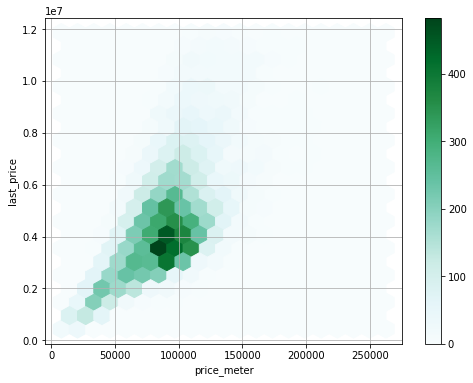

In [61]:
typical_ad_archive.plot(x='price_meter', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Коэффициент корреляции между ценой квардратного метра и ценой квартиры составляет 0,64 - зависимость средней степени, то есть с ростом цены за квадратный метр растет и общая цена квартиры, но так происходит невсегда.

Изучим зависимость цены квартиры от числа комнат:

In [62]:
typical_ad_archive['last_price'].corr(typical_ad_archive['rooms'])

0.40230316385099246

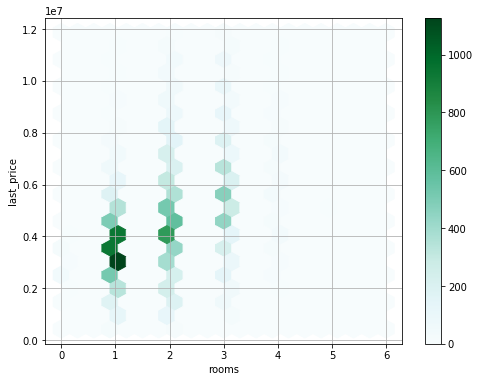

In [63]:
typical_ad_archive.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Коэффициент корреляции между количеством комнат и стоимостью квартиры 0,4 - слабая зависимость, то есть с увеличением числа комнат стоимость квартиры растет, но это не главный фактор, влияющий на нее.

Изучим зависимость цены квартиры от удаленности от центра:

In [64]:
typical_ad_archive['last_price'].corr(typical_ad_archive['cityCenters_nearest'])

-0.30273277018442124

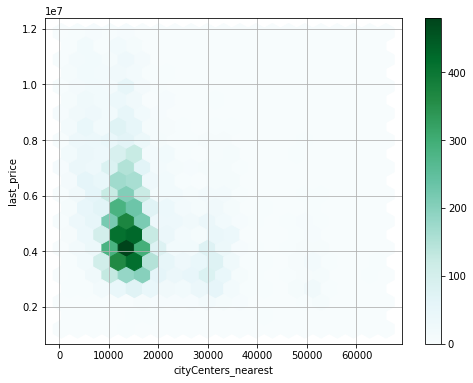

In [65]:
typical_ad_archive.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Коэффициент корреляции между удаленностью от центра и стоимостью квартиры "-0,3" - слабая обратно пропорциональнаяя зависимость, то есть с отдалением от центра стоимость квартиры понемногу падает.

Изучим зависимость стоимости квартиры от дня недели, месяца и года:

In [66]:
typical_ad_archive['last_price'].corr(typical_ad_archive['ad_weekday_number'])

-0.014252627296978652

In [67]:
typical_ad_archive['last_price'].corr(typical_ad_archive['ad_month'])

0.013372214059520438

In [68]:
typical_ad_archive['last_price'].corr(typical_ad_archive['ad_year'])

0.036233972701710616

Корреляция стоимости квартиры от дня недели, месяца и года практически равна нулю. То есть эти факторы на стоимость квартиры влияния не оказывают.

Изучим 10 населенных пунктов с наибольшим числом объявлений:

In [69]:
# построим сводную таблицу по столбцу locality_name, в которой посчитаем количество объявлений и медиану цены за квардартный
# метр по населенным пунктам
price_meter_median = typical_ad_archive.pivot_table(index='locality_name', values='price_meter', aggfunc=['count', 'median'])

# заменим названия колонок
price_meter_median.columns = ['count', 'median']

# отсортируем таблицу в порядке убывания по количеству объявлений
price_meter_median.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,8784,101768.050790
посёлок Мурино,361,85714.285714
посёлок Шушары,335,76562.500000
Всеволожск,303,65857.885615
посёлок Парголово,249,91250.000000
Колпино,231,74468.085106
Пушкин,229,98039.215686
Гатчина,216,66856.060606
деревня Кудрово,211,92297.899427


Самые дорогие квартиры в Санкт-Петербурге, Пушкине и деревне Кудрово, а самая низкая цена за квадратный метр в Выборге, Всеволожске и Гатчине.

Изучение квартир в Санкт-Петербурге и окрестностях

Создадим столбец с расстоянием до центра в километрах distanse_citycenter_km:

In [70]:
typical_ad_archive['distanse_citycenter_km'] = round(typical_ad_archive['cityCenters_nearest'] / 1000)

Выделим объявления в Санкт-Петербурге:

In [71]:
spb_ad_archve = typical_ad_archive.query('locality_name == "Санкт-Петербург"')
spb_ad_archve

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ratio_living_total_area,ratio_kitchen_total_area,too_large,too_expensive,a_lot_of_room,too_low_ceiling_height,too_high_ceiling_height,too_fast_sale,too_slow_sale,distanse_citycenter_km
3,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,52.7,22,False,...,0.736034,0.263966,False,False,False,False,False,False,False,12.0
5,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,0.714754,0.106557,False,False,False,False,False,False,False,15.0
6,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,0.512626,0.214646,False,False,False,False,False,False,False,14.0
10,8,3250000.0,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,...,0.625806,0.180645,False,False,False,False,False,False,False,11.0
12,13,3200000.0,31.6,2018-03-14,1,2.65,5.0,16.9,2,False,...,0.534810,0.180380,False,False,False,False,False,False,False,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14567,19,3550000.0,36.4,2016-06-08,1,2.65,16.0,14.9,13,False,...,0.409341,0.255495,False,False,False,False,False,False,False,12.0
14570,14,5000000.0,59.0,2019-04-04,3,2.50,5.0,52.0,1,False,...,0.881356,0.118644,False,False,False,False,False,False,False,12.0
14571,13,5250000.0,43.0,2018-05-11,2,2.50,5.0,29.0,2,False,...,0.674419,0.139535,False,False,False,False,False,False,False,7.0
14575,8,3300000.0,31.0,2017-04-29,1,2.55,9.0,18.0,6,False,...,0.580645,0.209677,False,False,False,False,False,False,False,12.0


Сформируем сводную таблицу, где для каждого километра посчитаем среднюю цену за квадратный метр и среднюю 

In [72]:
spb_ad_archve_pivot_price_meter = spb_ad_archve.pivot_table(index='distanse_citycenter_km', values='last_price', aggfunc='median')

Построим график, показывающий зависимость цены от удаленности от центра.

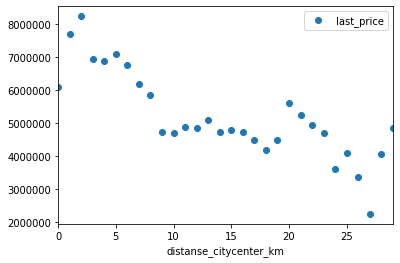

In [73]:
spb_ad_archve_pivot_price_meter.plot(style='o')

Наибольший перепад в цене квартиры между 7 и 8 км. То есть область, входящая в центр Санкт-Петербурга находится в радиусе 8 км.

Сформируем таблицу, которая находится в центре:

In [74]:
spb_centr = spb_ad_archve.query('distanse_citycenter_km < 8')

In [75]:
spb_centr['total_area'].median()

60.0

In [76]:
spb_centr['last_price'].median()

6900000.0

In [77]:
spb_centr['rooms'].median()

2.0

In [78]:
spb_centr['ceiling_height'].median()

2.65

Типичная выставленная на продажу квартира в Санкт-Петербурге имеет 2 комнаты общей площадью 60 м2, высотой потолков 2.65 м., и продается она по цене 6 900 тыс. руб.

Проверим зависимость стоимости квартиры от числа комнат, удаленности от центра, даты размещения объявления:

In [79]:
spb_centr['last_price'].corr(spb_centr['rooms'])

0.4497831070890606

Корреляция между стоимостью квартиры и числом комнаты 0,45 - слабая степень зависимости.

In [80]:
spb_centr['last_price'].corr(spb_centr['cityCenters_nearest'])

-0.1067130019579167

Корреляция между стоимостью квартиры и удаленностью от центра практически равна нулю. И это логично, т.к. рассматривается центр Санкт-Петербурга.

In [81]:
spb_centr['last_price'].corr(spb_centr['ad_weekday_number'])

0.042286722147761156

In [82]:
spb_centr['last_price'].corr(spb_centr['ad_month'])

0.018746084431763472

In [83]:
spb_centr['last_price'].corr(spb_centr['ad_year'])

0.07834775398511998

Зависимость цены квартиры от даты размещения объявления отсутствует.

### Шаг 5. Общий вывод

Основными факторами влияющими на цену квартиры являются цена квадратного метра, количество комнат, удаленность от центра. Дата размещения объявления не влияет на цену продажи квартиры вообще. При отслеживании аномалий и мошеннических действий следует особое внимание уделить объявлениям о продаже квартир в которых средняя площадь квартиры более 115 м2, комнат более 6. Так же следует обратить внимание на высоту потолков, в объявлениях встречались очень низкие и очень высокие потолки. Продажа квартиры менее чем за месяц тоже должна вызвать обращать на себя внимания при отслеживании мошеннических действий.